# Cross-chapter Box 7.1 Fig 1a historical warming

Plotting the data behind the cross-chapter box 7.1 figure 1a).

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import datetime as dt
import os.path

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import scmdata
import scmdata.database
import seaborn as sns
import tqdm.autonotebook as tqdman
from matplotlib.gridspec import GridSpec

import utils
import utils.cmip
import utils.plotting

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/database.py:19: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["axes.unicode_minus"] = False

<IPython.core.display.Javascript object>

## Assessed timeseries data

In [4]:
ASSESSED_TIMESERIES_FILE = os.path.join(
    utils.DATA_DIR,
    "raw",
    "ar6_gsat_assessment",
    "v20210218",
    "AR6 FGD assessment time series - GMST and GSAT.xlsx",
)
ASSESSED_TIMESERIES_FILE

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/ar6_gsat_assessment/v20210218/AR6 FGD assessment time series - GMST and GSAT.xlsx'

<IPython.core.display.Javascript object>

In [5]:
assessed_timeseries_ref_period = range(1850, 1900 + 1)  # see Notes sheet
assessed_timeseries = pd.read_excel(
    ASSESSED_TIMESERIES_FILE,
    sheet_name="Consolidated time series",
    header=None,
    names=["year", "value"],
)
assessed_timeseries

year     value
0    1850 -0.058676
1    1851  0.048824
2    1852  0.078824
3    1853  0.046324
4    1854  0.048824
..    ...       ...
166  2016  1.263824
167  2017  1.178824
168  2018  1.101324
169  2019  1.226324
170  2020  1.256324

[171 rows x 2 columns]

<IPython.core.display.Javascript object>

## Assessed ranges very likely range

In [6]:
ASSESSED_RANGES_CSV = utils.ASSESSED_RANGES_FILE
ASSESSED_RANGES_CSV

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/assessed-ranges/v20210222-wg1-assessed-ranges.csv'

<IPython.core.display.Javascript object>

In [7]:
assessed_ranges = pd.read_csv(ASSESSED_RANGES_CSV)
gsat_assessment = assessed_ranges[
    assessed_ranges["RCMIP name"]
    == "Surface Air Temperature Change World ssp245 1995-2014"
]

gsat_assessment_very_likely__lower = float(
    gsat_assessment["very_likely__lower"].values.squeeze()
)
display(gsat_assessment_very_likely__lower)
gsat_assessment_central = float(gsat_assessment["central"].values.squeeze())
display(gsat_assessment_central)
gsat_assessment_very_likely__upper = float(
    gsat_assessment["very_likely__upper"].values.squeeze()
)
display(gsat_assessment_very_likely__upper)
gsat_assessment

0.67

0.85

0.98

RCMIP name  \
4  Surface Air Temperature Change World ssp245 19...   

                   RCMIP variable RCMIP region RCMIP scenario  \
4  Surface Air Temperature Change        World         ssp245   

   evaluation_period_start  evaluation_period_end  norm_period_start  \
4                   1995.0                 2014.0             1850.0   

   norm_period_end  very_likely__lower  likely__lower  central  likely__upper  \
4           1900.0                0.67            NaN     0.85            NaN   

   very_likely__upper unit RCMIP evaluation method                 Source  
4                0.98    K                    mean  Final Box 2.3 Table 1

<IPython.core.display.Javascript object>

## CMIP data

In [8]:
CMIP_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "cmip6-science-unimelb",
    "cmip_data_tas_projections.nc",
)

<IPython.core.display.Javascript object>

In [9]:
db_cmip = utils.cmip.get_longest_ensemble_member_for_climate_model(
    scmdata.ScmRun.from_nc(CMIP_FILE),
    assessed_timeseries["year"].values,
    assessed_timeseries["year"].values,
)

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


No useable data for CESM1-WACCM rcp26
No useable data for CNRM-CM5 rcp26
No useable data for HadGEM2-AO rcp26
No useable data for HadGEM2-ES rcp26
No useable data for CESM1-BGC rcp45
No useable data for CESM1-WACCM rcp45
No useable data for CMCC-CM rcp45
No useable data for CNRM-CM5 rcp45
No useable data for CSIRO-Mk3L-1-2 rcp45
No useable data for CanCM4 rcp45
No useable data for HadCM3 rcp45
No useable data for HadGEM2-AO rcp45
No useable data for HadGEM2-CC rcp45
No useable data for MIROC4h rcp45
No useable data for inmcm4 rcp45
No useable data for HadGEM2-AO rcp60
No useable data for HadGEM2-ES rcp60
No useable data for CESM1-BGC rcp85
No useable data for CESM1-WACCM rcp85
No useable data for CMCC-CESM rcp85
No useable data for CMCC-CM rcp85
No useable data for CNRM-CM5 rcp85
No useable data for HadGEM2-AO rcp85
No useable data for HadGEM2-CC rcp85
No useable data for MRI-ESM1 rcp85
No useable data for inmcm4 rcp85
No useable data for CAMS-CSM1-0 ssp119
No useable data for EC-Earth

<IPython.core.display.Javascript object>

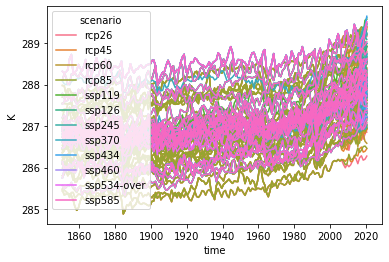

<IPython.core.display.Javascript object>

In [10]:
db_cmip.lineplot(hue="scenario", units="climate_model", estimator=None)

## RCM data

### MAGICC data

In [11]:
MAGICC_DIR = os.path.join(utils.MAGICC_OUTPUT_DIR, utils.MAGICC_SSP_RCP_OUTPUT_DIR)
db_magicc = scmdata.database.ScmDatabase(
    MAGICC_DIR, levels=("climate_model", "variable", "scenario")
)

<IPython.core.display.Javascript object>

In [12]:
magicc_data = db_magicc.load(
    climate_model="*", variable="Surface Air Temperature Change", scenario="*ssp*"
)
magicc_data.head()

Loading files:   0%|          | 0/33 [00:00<?, ?it/s]

time                                                                                           1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              4               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   

time                                                                                           1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              4               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   

time                                                                                           1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              4               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   

time                                                                                           1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              4               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   

time                                                                                           1754-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change         

<IPython.core.display.Javascript object>

In [13]:
magicc_data["scenario"].unique()

array(['ssp370', 'esm-ssp534-over-allGHG', 'esm-ssp460',
       'esm-ssp534-over', 'ssp119', 'ssp245', 'esm-ssp245-allGHG-WG3',
       'ssp245-1750-start', 'esm-ssp460-allGHG-WG3', 'esm-ssp119-allGHG',
       'esm-ssp434', 'esm-ssp434-allGHG-WG3', 'ssp585',
       'esm-ssp585-allGHG', 'esm-ssp126', 'esm-ssp434-allGHG',
       'esm-ssp119', 'esm-ssp585', 'esm-ssp126-allGHG-WG3',
       'esm-ssp370-allGHG-WG3', 'esm-ssp126-allGHG',
       'esm-ssp585-allGHG-WG3', 'ssp126', 'esm-ssp370',
       'esm-ssp370-allGHG', 'esm-ssp245', 'ssp534-over',
       'esm-ssp245-allGHG', 'esm-ssp460-allGHG', 'esm-ssp119-allGHG-WG3',
       'ssp460', 'esm-ssp534-over-allGHG-WG3', 'ssp434'], dtype=object)

<IPython.core.display.Javascript object>

### OSCAR data

In [14]:
OSCAR_DIR = os.path.join(
    utils.DATA_DIR, "raw", "oscar", utils.OSCAR_VERSION, "scmdatabase"
)
display(OSCAR_DIR)
db_oscar = scmdata.database.ScmDatabase(
    OSCAR_DIR, levels=("climate_model", "variable", "scenario")
)
db_oscar.available_data()

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/oscar/v20210217/scmdatabase'

climate_model                                      variable      scenario
0    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014       1pctCO2
1    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014  abrupt-4xCO2
2    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014    historical
3    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp119
4    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp126
5    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp245
6    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp370
7    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp434
8    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp460
9    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014   ssp534-over
10   OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp585

<IPython.core.display.Javascript object>

In [15]:
oscar_data = db_oscar.load(
    climate_model="*",
    variable="Surface Air Temperature Change|wrt 1995-2014",
    scenario="ssp245",
)
oscar_data.head()

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

time                                                                                                             1850-01-01 00:00:00  \
climate_model ensemble_member model           region scenario unit variable                                                            
OSCARv3.1.1   0.00            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -2.536374   
              0.01            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.036152   
              0.02            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.035435   
              0.03            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.034718   
              0.04            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.031402   

time                                                                                                             1851-01-01 00:00:00  \
climate_model ensemble_member model           region scenario unit variable                                                            
OSCARv3.1.1   0.00            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -2.516627   
              0.01            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.028309   
              0.02            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.027592   
              0.03            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.026874   
              0.04            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.023549   

time                                                                                                             1852-01-01 00:00:00  \
climate_model ensemble_member model           region scenario unit variable                                                            
OSCARv3.1.1   0.00            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -2.510510   
              0.01            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.025422   
              0.02            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.024705   
              0.03            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.023988   
              0.04            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.020666   

time                                                                                                             1853-01-01 00:00:00  \
climate_model ensemble_member model           region scenario unit variable                                                            
OSCARv3.1.1   0.00            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -2.505056   
              0.01            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.023359   
              0.02            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.022642   
              0.03            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.021926   
              0.04            MESSAGE_GLOBIOM World  ssp245   K    Surface Air Temperature Change|wrt 1995-2014            -1.018608   

time                                                                                                             1854-01-01 00:00:00  \
climate_model ensemble_member model           region

<IPython.core.display.Javascript object>

In [16]:
oscar_data["variable"] = "Surface Air Temperature Change"

<IPython.core.display.Javascript object>

In [17]:
OSCAR_SUMMARY_FILE = os.path.join(
    utils.DATA_DIR,
    "raw",
    "oscar",
    utils.OSCAR_VERSION,
    "IPCC_AR6_OSCAR_indicators.csv",
)
oscar_summary = pd.read_csv(OSCAR_SUMMARY_FILE)
oscar_summary = oscar_summary[
    oscar_summary["RCMIP name"].str.startswith("Surface Air Temperature Change World")
]
oscar_summary

RCMIP name climate_model unit  \
404   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
405   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
406   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
407   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
408   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
...                                                 ...           ...  ...   
3025  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   
3026  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   
3027  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   
3028  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   
3029  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   

      ensemble_member     value  
404                 0 -0.514234  
405                 1  0.625508  
406                 2  0.626312  
407                 3  0.632336  
408                 4  0.643554  
...               ...       ...  
3025               96  3.726375  
3026               97  4.035269  
3027               98  4.036627  
3028               99  4.110214  
3029              100  5.904180  

[2525 rows x 5 columns]

<IPython.core.display.Javascript object>

### Cicero data

In [18]:
CICERO_DIR = os.path.join(
    utils.DATA_DIR,
    "raw",
    "cicero",
    utils.CICERO_VERSION,
    "scmdatabase",
)
db_cicero = scmdata.database.ScmDatabase(
    CICERO_DIR, levels=("climate_model", "variable", "scenario")
)
db_cicero.available_data()

climate_model                        variable                   scenario
0     Cicero-SCM  Surface-Air-Temperature-Change                    1pctCO2
1     Cicero-SCM  Surface-Air-Temperature-Change             abrupt-0p5xCO2
2     Cicero-SCM  Surface-Air-Temperature-Change               abrupt-2xCO2
3     Cicero-SCM  Surface-Air-Temperature-Change               abrupt-4xCO2
4     Cicero-SCM  Surface-Air-Temperature-Change                 historical
5     Cicero-SCM  Surface-Air-Temperature-Change                     ssp119
6     Cicero-SCM  Surface-Air-Temperature-Change                     ssp126
7     Cicero-SCM  Surface-Air-Temperature-Change                     ssp245
8     Cicero-SCM  Surface-Air-Temperature-Change                     ssp370
9     Cicero-SCM  Surface-Air-Temperature-Change  ssp370-lowNTCF-aerchemmip
10    Cicero-SCM  Surface-Air-Temperature-Change      ssp370-lowNTCF-gidden
11    Cicero-SCM  Surface-Air-Temperature-Change                     ssp434
12    Cicero-SCM  Surface-Air-Temperature-Change                     ssp460
13    Cicero-SCM  Surface-Air-Temperature-Change                ssp534-over
14    Cicero-SCM  Surface-Air-Temperature-Change                     ssp585

<IPython.core.display.Javascript object>

In [19]:
cicero_data = db_cicero.load(
    climate_model="*", variable="Surface Air Temperature Change", scenario="ssp245"
)
cicero_data.head()

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

time                                                                                           1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp245   K    Surface Air Temperature Change             0.064991   
              150             unspecified World  ssp245   K    Surface Air Temperature Change             0.118409   
              2420            unspecified World  ssp245   K    Surface Air Temperature Change             0.087551   
              2520            unspecified World  ssp245   K    Surface Air Temperature Change             0.119339   
              3110            unspecified World  ssp245   K    Surface Air Temperature Change             0.079923   

time                                                                                           1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp245   K    Surface Air Temperature Change             0.100960   
              150             unspecified World  ssp245   K    Surface Air Temperature Change             0.161447   
              2420            unspecified World  ssp245   K    Surface Air Temperature Change             0.119694   
              2520            unspecified World  ssp245   K    Surface Air Temperature Change             0.150579   
              3110            unspecified World  ssp245   K    Surface Air Temperature Change             0.121478   

time                                                                                           1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp245   K    Surface Air Temperature Change             0.125065   
              150             unspecified World  ssp245   K    Surface Air Temperature Change             0.175011   
              2420            unspecified World  ssp245   K    Surface Air Temperature Change             0.133716   
              2520            unspecified World  ssp245   K    Surface Air Temperature Change             0.163470   
              3110            unspecified World  ssp245   K    Surface Air Temperature Change             0.138489   

time                                                                                           1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp245   K    Surface Air Temperature Change             0.140984   
              150             unspecified World  ssp245   K    Surface Air Temperature Change             0.178284   
              2420            unspecified World  ssp245   K    Surface Air Temperature Change             0.139917   
              2520            unspecified World  ssp245   K    Surface Air Temperature Change             0.167774   
              3110            unspecified World  ssp245   K    Surface Air Temperature Change             0.145945   

time                                                                                           1754-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp245   K    Surface Air Temperature Change             0.150844   
              150             unspecified World  ssp245   K    Surface Air Temperature Change             0.177086   
              2420            unspecified World  ssp245   K    Surface Air Temperature Change             0.141949   
              2520            unspecified World  ssp245   K    Surface Air Temperature Change         

<IPython.core.display.Javascript object>

### FaIR data

In [20]:
FAIR_DIR = os.path.join(
    utils.DATA_DIR, "raw", "fair", utils.FAIR_VERSION, "scmdatabase"
)
db_fair = scmdata.database.ScmDatabase(
    FAIR_DIR, levels=("climate_model", "variable", "scenario")
)

fair_data = db_fair.load(
    climate_model="*", variable="Surface Air Temperature Change", scenario="ssp245"
)
fair_data.head()

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

time                                                                                           1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp245   K    Surface Air Temperature Change             0.027773   
              1               unspecified World  ssp245   K    Surface Air Temperature Change             0.027427   
              2               unspecified World  ssp245   K    Surface Air Temperature Change             0.037725   
              3               unspecified World  ssp245   K    Surface Air Temperature Change             0.029093   
              4               unspecified World  ssp245   K    Surface Air Temperature Change             0.034272   

time                                                                                           1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp245   K    Surface Air Temperature Change             0.049784   
              1               unspecified World  ssp245   K    Surface Air Temperature Change             0.046396   
              2               unspecified World  ssp245   K    Surface Air Temperature Change             0.058335   
              3               unspecified World  ssp245   K    Surface Air Temperature Change             0.051564   
              4               unspecified World  ssp245   K    Surface Air Temperature Change             0.060837   

time                                                                                           1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp245   K    Surface Air Temperature Change             0.066297   
              1               unspecified World  ssp245   K    Surface Air Temperature Change             0.057564   
              2               unspecified World  ssp245   K    Surface Air Temperature Change             0.067246   
              3               unspecified World  ssp245   K    Surface Air Temperature Change             0.068282   
              4               unspecified World  ssp245   K    Surface Air Temperature Change             0.079796   

time                                                                                           1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp245   K    Surface Air Temperature Change             0.077479   
              1               unspecified World  ssp245   K    Surface Air Temperature Change             0.062055   
              2               unspecified World  ssp245   K    Surface Air Temperature Change             0.068115   
              3               unspecified World  ssp245   K    Surface Air Temperature Change             0.078017   
              4               unspecified World  ssp245   K    Surface Air Temperature Change             0.090674   

time                                                                                           1754-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp245   K    Surface Air Temperature Change             0.083798   
              1               unspecified World  ssp245   K    Surface Air Temperature Change             0.061441   
              2               unspecified World  ssp245   K    Surface Air Temperature Change             0.063852   
              3               unspecified World  ssp245   K    Surface Air Temperature Change         

<IPython.core.display.Javascript object>

In [21]:
sorted(fair_data["scenario"].unique())

['ssp245']

<IPython.core.display.Javascript object>

## Plot

In [22]:
alldat = scmdata.run_append(
    [
        scmdata.ScmRun(v.timeseries(time_axis="year", drop_all_nan_times=True))
        for v in [db_cmip, magicc_data, oscar_data, cicero_data, fair_data]
    ]
).filter(variable=["tas", "*Temp*"])
alldat.head()

time                                                                               1750-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1751-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1752-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1753-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1754-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1755-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    

<IPython.core.display.Javascript object>

In [23]:
alldat["climate_model"].unique()

array(['BNU-ESM', 'CCSM4', 'CESM1-CAM5', 'CSIRO-Mk3-6-0', 'CanESM2',
       'EC-EARTH', 'FGOALS-g2', 'FIO-ESM', 'GISS-E2-H', 'GISS-E2-R',
       'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'MIROC-ESM', 'MIROC-ESM-CHEM',
       'MIROC5', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MRI-CGCM3', 'NorESM1-M',
       'NorESM1-ME', 'bcc-csm1-1', 'bcc-csm1-1-m', 'ACCESS1-0',
       'ACCESS1-3', 'CESM1-CAM5-1-FV2', 'CMCC-CMS', 'GISS-E2-H-CC',
       'GISS-E2-R-CC', 'IPSL-CM5B-LR', 'CNRM-ESM2-1', 'CanESM5',
       'EC-Earth3', 'FGOALS-g3', 'GISS-E2-1-G', 'IPSL-CM6A-LR',
       'MIROC-ES2L', 'MIROC6', 'MRI-ESM2-0', 'UKESM1-0-LL', 'ACCESS-CM2',
       'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CESM2-WACCM',
       'CMCC-CM2-SR5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CanESM5-CanOE',
       'EC-Earth3-Veg', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM',
       'MPI-ESM1-2-LR', 'BCC-ESM1', 'MPI-ESM-1-2-HAM', 'MAGICCv7.5.1',
       'OSCARv3.1.1', 'Cicero-SCM', 'FaIRv1.6.2'], dtype=object)

<IPython.core.display.Javascript object>

In [24]:
def determine_model_family(cm):
    if "MAGICC" in cm:
        return cm

    if "Cicero-SCM" in cm:
        return "CICERO-SCM"

    if "OSCARv3.1" in cm:
        return cm

    if "FaIRv1.6.2" in cm:
        return "FaIRv1.6.2"

    return "CMIP6 MME"


alldat["model_family"] = alldat["climate_model"].apply(determine_model_family)
alldat.head()

time                                                                                            1750-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   

time                                                                                            1751-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   

time                                                                                            1752-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   

time                                                                                            1753-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CanESM2       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   

time                                                                                            1754-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    Worl

<IPython.core.display.Javascript object>

In [25]:
def calculate_median(inp, evaluation_period):
    return (
        inp.filter(year=evaluation_period).timeseries().mean(axis="columns")
    ).median()


def set_median_to_zero(
    inp,
    ref_period,
    evaluation_period,
    groupby=(
        "model_family",
        "scenario",
    ),
):
    out = []
    for sdf in inp.groupby(groupby):
        sdf_rebased = sdf.relative_to_ref_period_mean(year=ref_period)
        sdf_rebased_median = calculate_median(sdf_rebased, evaluation_period)
        sdf_rebased_shifted = sdf_rebased - sdf_rebased_median
        np.testing.assert_allclose(
            calculate_median(sdf_rebased_shifted, evaluation_period), 0, atol=1e-10
        )
        out.append(scmdata.ScmRun(sdf_rebased_shifted))

    out = scmdata.run_append(out)

    return out

<IPython.core.display.Javascript object>

In [26]:
def make_ts_ax(
    scmrun,
    cmip6_dat,
    ar6_timeseries,
    ax,
    hue_palette=None,
    hue_var="climate_model",
    hue_label="Climate model",
    style_dict=None,
    style_var="scenario",
    style_label="Scenario",
    quantiles_plumes=[
        ((0.05, 0.95), 0.5),
        ((0.5,), 1.0),
    ],
    linewidth=3,
    alpha=0.7,
    linewidth_cmip6=0.5,
    alpha_cmip6=0.4,
    colour_cmip6="black",
    linewidth_ar6=3,
    alpha_ar6=0.8,
    alpha_ar6_plume=0.3,
    colour_ar6="tab:blue",
    linestyle_ar6="--",
    quantile_over=("ensemble_member",),
    loc_legend="upper left",
):
    _quantiles_calc = []
    for q, _ in quantiles_plumes:
        for v in q:
            _quantiles_calc.append(v)

    summary_stats = scmdata.ScmRun(
        scmrun.quantiles_over(
            cols=quantile_over,
            quantiles=_quantiles_calc,
        )
    )
    ax, legend_items = summary_stats.plumeplot(
        ax=ax,
        time_axis="year",
        palette=hue_palette,
        hue_var=hue_var,
        hue_label=hue_label,
        dashes=style_dict,
        style_var=style_var,
        style_label=style_label,
        quantiles_plumes=quantiles_plumes,
        linewidth=linewidth,
        pre_calculated=True,
    )

    ar6_line = ax.plot(
        ar6_timeseries["year"],
        ar6_timeseries["value"],
        linewidth=linewidth_ar6,
        alpha=alpha_ar6,
        color=colour_ar6,
        label="Box 2.3 assessed timeseries",
        linestyle=linestyle_ar6,
    )[0]
    #     ax.fill_between(
    #         ch4_dat["year"],
    #         ch4_dat.filter(percentile=5).values.squeeze(),
    #         ch4_dat.filter(percentile=95).values.squeeze(),
    #         alpha=alpha_ch4_plume,
    #         color=colour_ch4,
    #     )

    ax = cmip6_dat.lineplot(
        units="climate_model",
        estimator=None,
        ax=ax,
        time_axis="year",
        linewidth=linewidth_cmip6,
        alpha=alpha_cmip6,
        palette=[colour_cmip6],
    )
    cmip6_line_fake = mlines.Line2D(
        [0],
        [0],
        **{"color": colour_cmip6, "linewidth": linewidth_cmip6},
        label=cmip6_dat.get_unique_meta(hue_var, no_duplicates=True)
    )

    legend_items_new = []
    for v in legend_items:
        legend_items_new.append(v)

        if isinstance(v, mpatches.Patch):
            if v.get_label() == "Source":
                legend_items_new.append(cmip6_line_fake)
                legend_items_new.append(ar6_line)

    ax.legend(handles=legend_items_new, loc=loc_legend)

    return ax, legend_items

<IPython.core.display.Javascript object>

In [27]:
def take_20_year_mean(inp):
    out = (
        inp.timeseries(time_axis="year")
        .dropna(axis="rows", how="all")
        .rolling(window=20, center=True, axis="columns")
        .mean()
        .dropna(axis="columns")
    )
    # adjust columns by six months so they properly sit on the centre
    out.columns = out.columns.map(lambda x: dt.datetime(x - 1, 7, 2))

    return scmdata.ScmRun(out)

<IPython.core.display.Javascript object>

In [28]:
def get_pdf_subbox(median, upper, lower, source, scenario, time_range):
    out = [
        {
            "value": float(median),
            "source": source,
            "scenario": scenario,
            "time_range": "{}-{}".format(time_range[0], time_range[-1]),
        }
    ]
    for i in range(50):
        out.append(
            {
                "value": float(upper),
                "source": source,
                "scenario": scenario,
                "time_range": "{}-{}".format(time_range[0], time_range[-1]),
            }
        )
        out.append(
            {
                "value": float(lower),
                "source": source,
                "scenario": scenario,
                "time_range": "{}-{}".format(time_range[0], time_range[-1]),
            }
        )

    return pd.DataFrame(out)

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/ipykernel_launcher.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


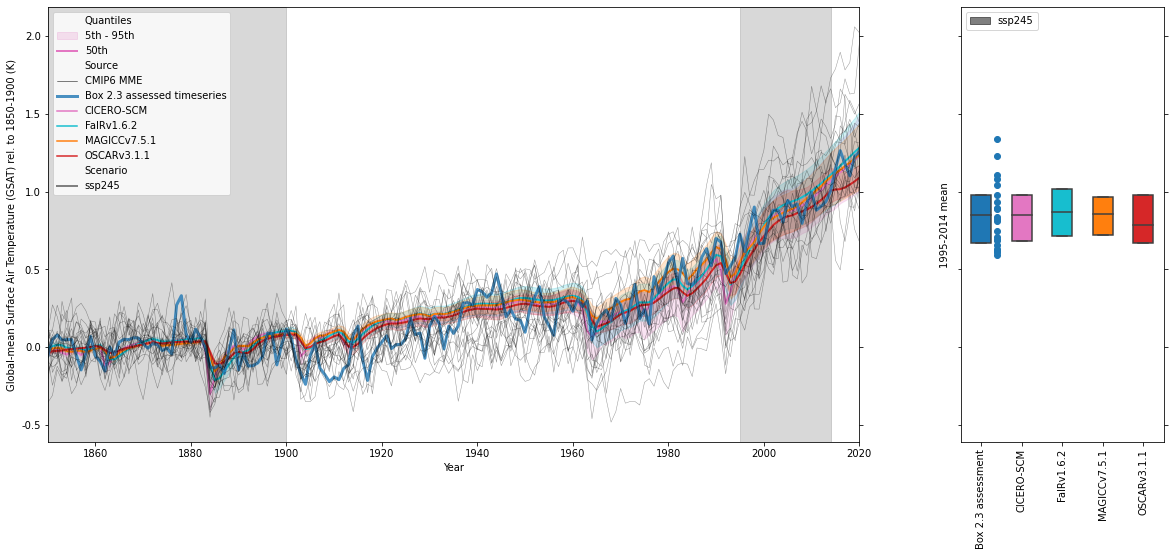

<IPython.core.display.Javascript object>

In [29]:
quantiles_plumes = [
    ((0.05, 0.95), 0.2),
    ((0.5,), 1.0),
]
scenarios = [
    "ssp245",
]

# smooth_emulators = True
smooth_emulators = False
time_ranges = (range(1995, 2014 + 1),)

assessed_name = "Box 2.3 assessment"
hue_var = "model_family"
hue_palette = utils.plotting.RCM_PALETTE
hue_palette[assessed_name] = "tab:blue"

ref_period = range(1850, 1900 + 1)
plt_years = range(1850, 2020 + 1)
figsize = (20, 8)


assert ref_period == assessed_timeseries_ref_period, "rebase assessed timeseries"

for scenario in sorted(scenarios):
    pdf = alldat.filter(
        scenario=[
            scenario,
        ]
    )

    pdf_cmip = (
        pdf.filter(model_family="CMIP6*")
        .relative_to_ref_period_mean(year=ref_period)
        .filter(year=plt_years)
    )

    pdf_emulators = pdf.filter(model_family="CMIP6*", keep=False)

    # Match calculation used by Ch. 4 for the concentration-driven runs
    # i.e. make all ensemble members have zero mean over the reference period.
    # This ensures a like for like comparison.
    pdf_emulators_conc_driven = pdf_emulators.filter(scenario=scenario)
    pdf_emulators_conc_driven = pdf_emulators_conc_driven.relative_to_ref_period_mean(
        year=ref_period
    )

    pdf_emulators = scmdata.run_append([pdf_emulators_conc_driven])

    pdf_emulators_line = pdf_emulators_conc_driven

    if smooth_emulators:
        pdf_emulators_line = take_20_year_mean(pdf_emulators_line)

    pdf_emulators_line = pdf_emulators_line.filter(year=plt_years)

    fig = plt.figure(figsize=figsize)
    gs = GridSpec(
        1,
        2,
        width_ratios=[4, 1],
        wspace=0.2,
    )

    ax_ts = fig.add_subplot(gs[0, 0])
    ax_ts.tick_params(right=True)

    ax_evaluation_period = fig.add_subplot(gs[0, 1])

    ax_ts, legend_items = make_ts_ax(
        pdf_emulators_line,
        pdf_cmip,
        assessed_timeseries,
        ax_ts,
        alpha=1,
        hue_palette=hue_palette,
        hue_var=hue_var,
        hue_label="Source",
        style_dict={
            scenario: "-",
        },
        style_var="scenario",
        style_label="Scenario",
        quantiles_plumes=quantiles_plumes,
        linewidth=2,
        linestyle_ar6="-",
        linewidth_ar6=3,
    )

    ax_ts.set_xlim(plt_years[0], plt_years[-1])
    ylim = ax_ts.get_ylim()
    ax_ts.set_xlabel("Year")
    ax_ts.set_ylabel(
        f"Global-mean Surface Air Temperature (GSAT) rel. to "
        f"{ref_period[0]}-{ref_period[-1]} "
        f"({pdf_cmip.get_unique_meta('unit', no_duplicates=True)})"
    )

    pdf_emulators = take_20_year_mean(pdf_emulators)

    for ax, time_range in zip((ax_evaluation_period,), time_ranges):
        time_range_mid_point = (time_range[0] + time_range[-1]) / 2
        int_year = int(time_range_mid_point)

        box_assessed = get_pdf_subbox(
            median=gsat_assessment_central,
            upper=gsat_assessment_very_likely__upper,
            lower=gsat_assessment_very_likely__lower,
            source=assessed_name,
            scenario=scenario,
            time_range=time_range,
        )

        pdf_box = [box_assessed]
        box_data = [box_assessed["value"].values.squeeze()]
        box_labels = [(assessed_name, scenario)]

        for cm_scenario_scmrun in pdf_emulators.groupby((hue_var, "scenario")):
            cm = cm_scenario_scmrun.get_unique_meta(hue_var, no_duplicates=True)
            cm_scenario = cm_scenario_scmrun.get_unique_meta(
                "scenario", no_duplicates=True
            )
            if cm.startswith("OSCAR"):
                # don't have ensemble members so have to use reported data
                oscar_rcmip_name = f"Surface Air Temperature Change World {cm_scenario} {time_range[0]}-{time_range[-1]}"
                oscar_reported = oscar_summary[
                    (oscar_summary["RCMIP name"] == oscar_rcmip_name)
                ]
                cm_scenario_scmrun_subbox = get_pdf_subbox(
                    median=oscar_reported["value"].median(),
                    upper=oscar_reported["value"].quantile(q=0.95),
                    lower=oscar_reported["value"].quantile(q=0.05),
                    source=cm,
                    scenario=cm_scenario,
                    time_range=time_range,
                )

            else:
                # calculate from ensemble members

                cm_scenario_scmrun_year = cm_scenario_scmrun.filter(
                    year=int_year, month=7
                )

                cm_scenario_scmrun_subbox = get_pdf_subbox(
                    median=cm_scenario_scmrun_year.process_over(
                        ("ensemble_member",), "quantile", q=0.5
                    ).values.squeeze(),
                    upper=cm_scenario_scmrun_year.process_over(
                        ("ensemble_member",), "quantile", q=0.95
                    ).values.squeeze(),
                    lower=cm_scenario_scmrun_year.process_over(
                        ("ensemble_member",), "quantile", q=0.05
                    ).values.squeeze(),
                    source=cm,
                    scenario=cm_scenario,
                    time_range=time_range,
                )

            pdf_box.append(cm_scenario_scmrun_subbox)
            box_data.append(pdf_box[-1]["value"].values.squeeze())
            box_labels.append((cm, cm_scenario))

        pdf_box = pd.concat(pdf_box)

        ax = sns.boxplot(
            data=pdf_box,
            x="source",
            y="value",
            ax=ax,
            whis=0,
            hue="scenario",
            width=0.5,
            #             patch_artist=True,
        )
        xvals = ax.get_xticks()
        xlabels = [v.get_text() for v in ax.get_xticklabels()]

        for v in ax.get_children():
            if v.get_label() == scenario:
                scenario_colour = v.get_facecolor()
                v.set_facecolor("tab:gray")

        for v in ax.get_children():
            if isinstance(v, mpatches.PathPatch):
                current_colour = v.get_facecolor()

                x_spot = np.round(v.get_path().vertices[0][0], 0)
                x_index = np.where(xvals == x_spot)[0][0]
                label = xlabels[x_index]
                v.set_facecolor(hue_palette[label])

        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_yticklabels([])
        ax.set_ylim(ylim)
        ax.tick_params(right=True)
        ax.set_ylabel(f"{time_range[0]}-{time_range[-1]} mean")
        ax.set_xlabel("")
        ax.legend(loc="upper left")

        scat_vals = (
            pdf_cmip.filter(year=time_range)
            .timeseries()
            .dropna()
            .mean(axis="columns")
            .values
        )
        ax.scatter(
            np.ones_like(scat_vals) * 0.4,
            scat_vals,
            marker="o",
        )

    vspan_kwargs = dict(color="tab:gray", alpha=0.3)
    ax_ts.axvspan(ref_period[0], ref_period[-1], **vspan_kwargs)
    ax_ts.axvspan(time_ranges[0][0], time_ranges[0][-1], **vspan_kwargs)

    out_file_cmip_data = (
        f"box7-1_{scenario}_{plt_years[0]}-{plt_years[-1]}_" f"cmip_models.csv"
    )
    pdf_cmip.timeseries().dropna(how="all").reset_index()[
        ["climate_model", "member_id"]
    ].drop_duplicates()  # .to_csv(out_file_cmip_data, index=False)

    plt.tight_layout()
    #     plt.savefig(
    #         "box7-1_hist_emulator-assessed-ranges-timeseries.pdf",
    #         transparent=True,
    #     )

    plt.show()
#     break